In [1]:
%load_ext autoreload
%autoreload 2

# check pytorch version
import pandas as pd
!pip install pytorch==1.4.0
import torch
print(torch.__version__)
! pip install torch-lr-finder --quiet
# from numpy import vstack
from numpy import argmax
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
torch.backends.cudnn.benchmark = True

ERROR: Could not find a version that satisfies the requirement pytorch==1.4.0 (from versions: 0.1.2, 1.0.2)
ERROR: No matching distribution found for pytorch==1.4.0
1.10.0+cu111


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# import torch
# torch.cuda.is_available()
import sys
sys.path.append('/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/')
from src.utils import *
from src.plot_utils import *
from src.model import FC_10, ModularFC
!pip install livelossplot --quiet
from src.trainManager import *

device = get_default_device()

train_dl, val_dl, test_dl = prepare_data('miniBooneRis', 512, 512, 1024)
criterion = CrossEntropyLoss()

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6ff10050>


In [ ]:

# train_dl, val_dl, test_dl = prepare_data('cnae-9', 512, 512, 1024)
# criterion = CrossEntropyLoss()

# Normal distribution

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.92E-03


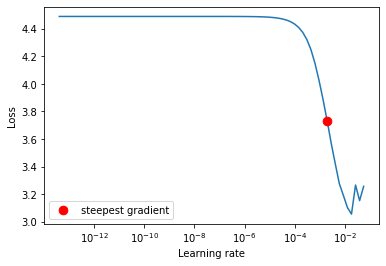

In [31]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,25,30,35,40,40,35,30,25,20]

# model = FC_10(27, 100, dimList)
model = ModularFC(50, dimList, 2)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

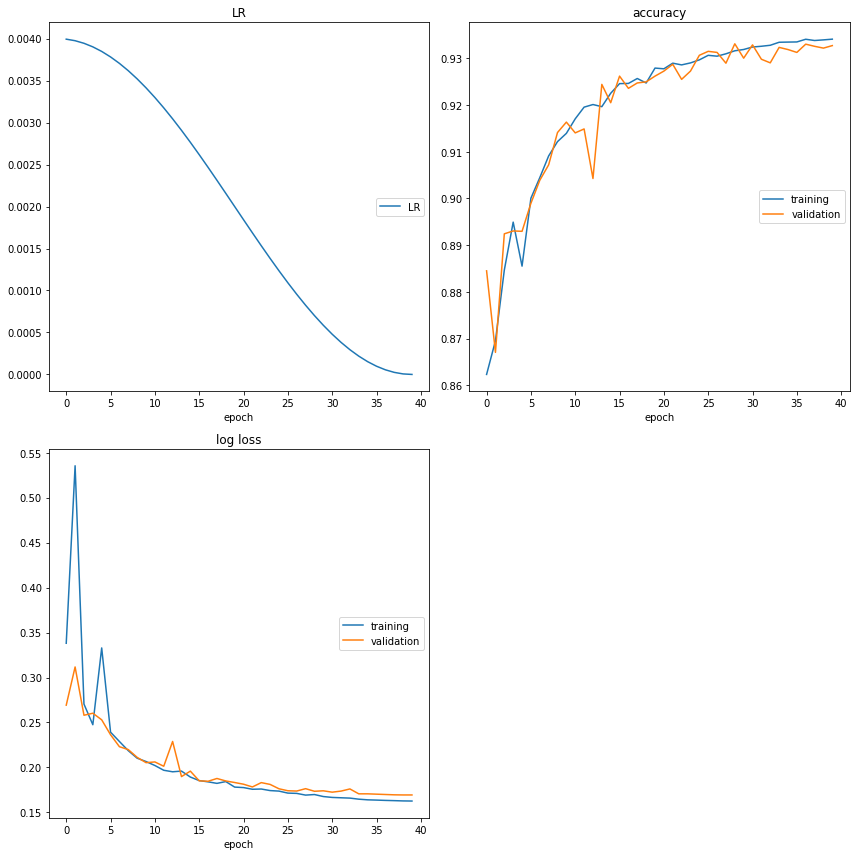

LR
	LR               	 (min:    0.000, max:    0.004, cur:    0.000)
accuracy
	training         	 (min:    0.862, max:    0.934, cur:    0.934)
	validation       	 (min:    0.867, max:    0.933, cur:    0.933)
log loss
	training         	 (min:    0.163, max:    0.535, cur:    0.163)
	validation       	 (min:    0.169, max:    0.312, cur:    0.169)


In [32]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [4E-03]
num_epochs = 40
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6e8f2690>


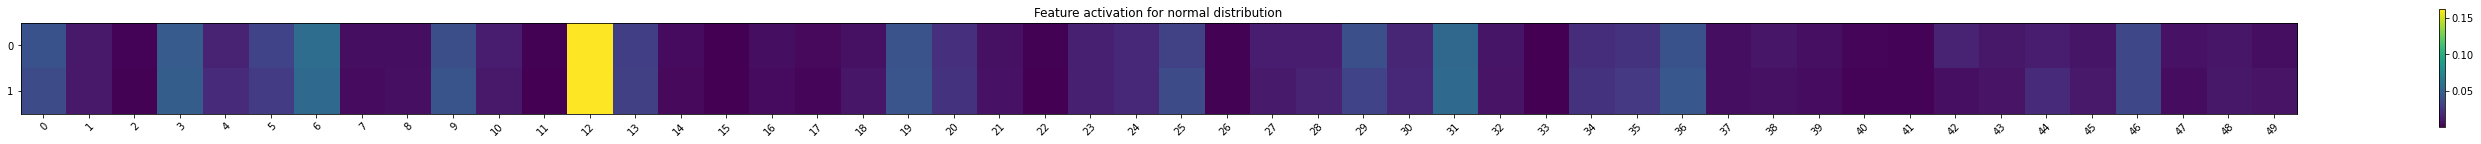

In [33]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test', data='miniBooneRis', num_features=50, num_classes=2)
plot_saliency_by_features(avg_saliency, 2, 50, 'Feature activation for normal distribution', 40, 2)

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6f793750>


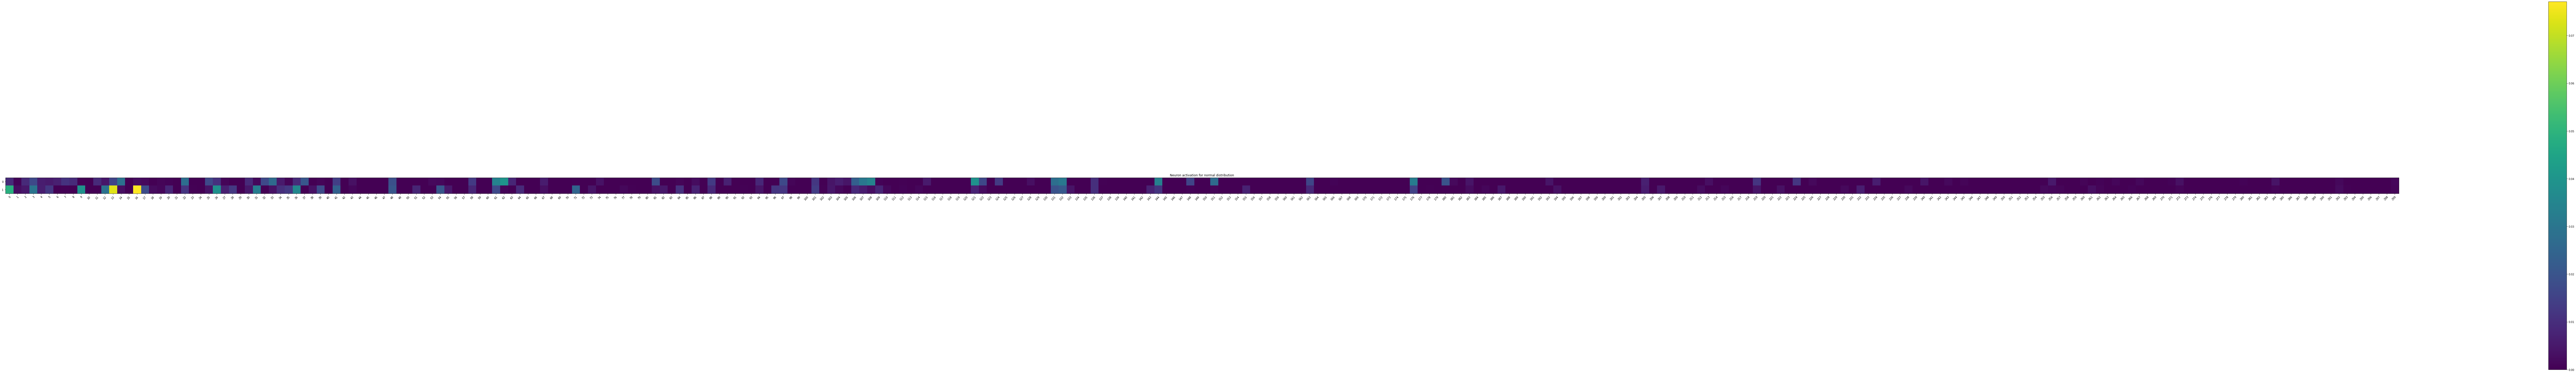

In [34]:
avg_activation = compute_model_activations(model, mode='test',num_classes=2,data='miniBooneRis')
plot_saliency_by_features(avg_activation, 2, 300, 'Neuron activation for normal distribution', 160, 20)

# Uniform distribution

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.32E-03


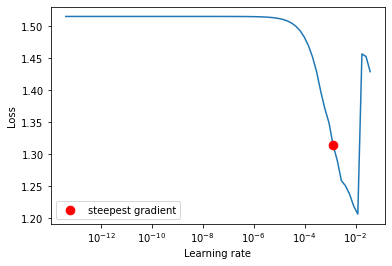

In [23]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [30,30,30,30,30,30,30,30,30,30]

model = ModularFC(50, dimList, 2)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

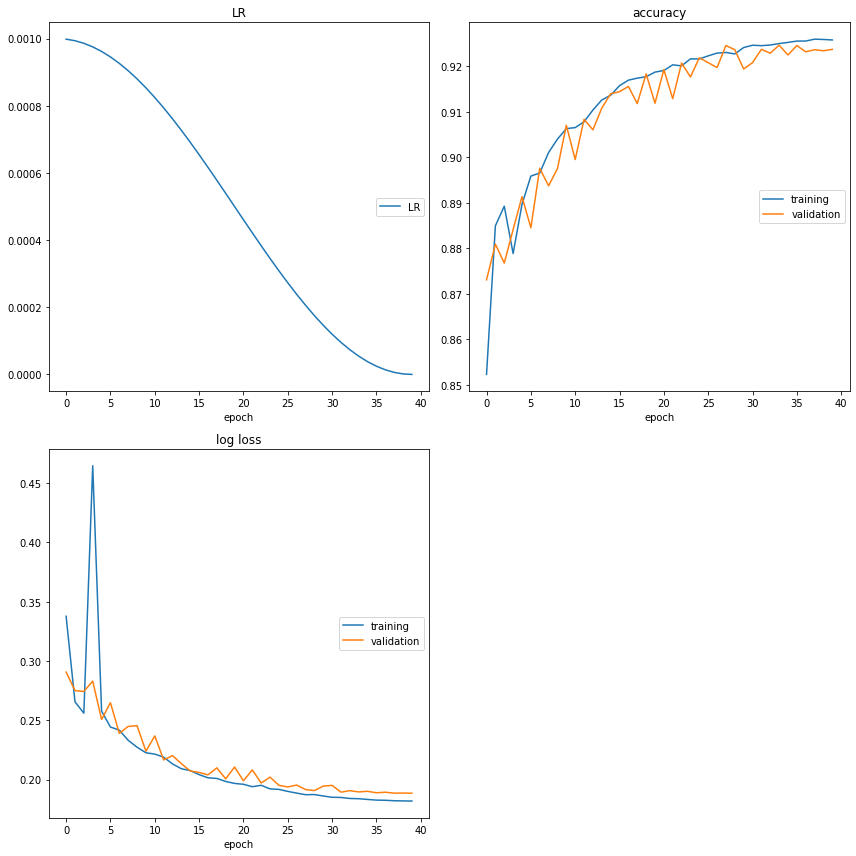

LR
	LR               	 (min:    0.000, max:    0.001, cur:    0.000)
accuracy
	training         	 (min:    0.852, max:    0.926, cur:    0.926)
	validation       	 (min:    0.873, max:    0.925, cur:    0.924)
log loss
	training         	 (min:    0.182, max:    0.465, cur:    0.182)
	validation       	 (min:    0.189, max:    0.291, cur:    0.189)


In [24]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
num_epochs = 40
lr_list = [1E-03]
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6ec14410>


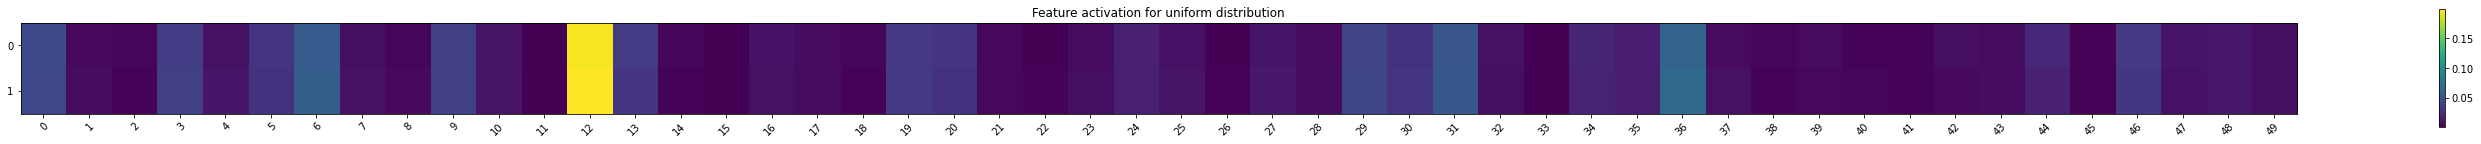

In [25]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test', data='miniBooneRis', num_features=50, num_classes=2)
plot_saliency_by_features(avg_saliency, 2, 50, 'Feature activation for uniform distribution', 40, 2)

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6ef39690>


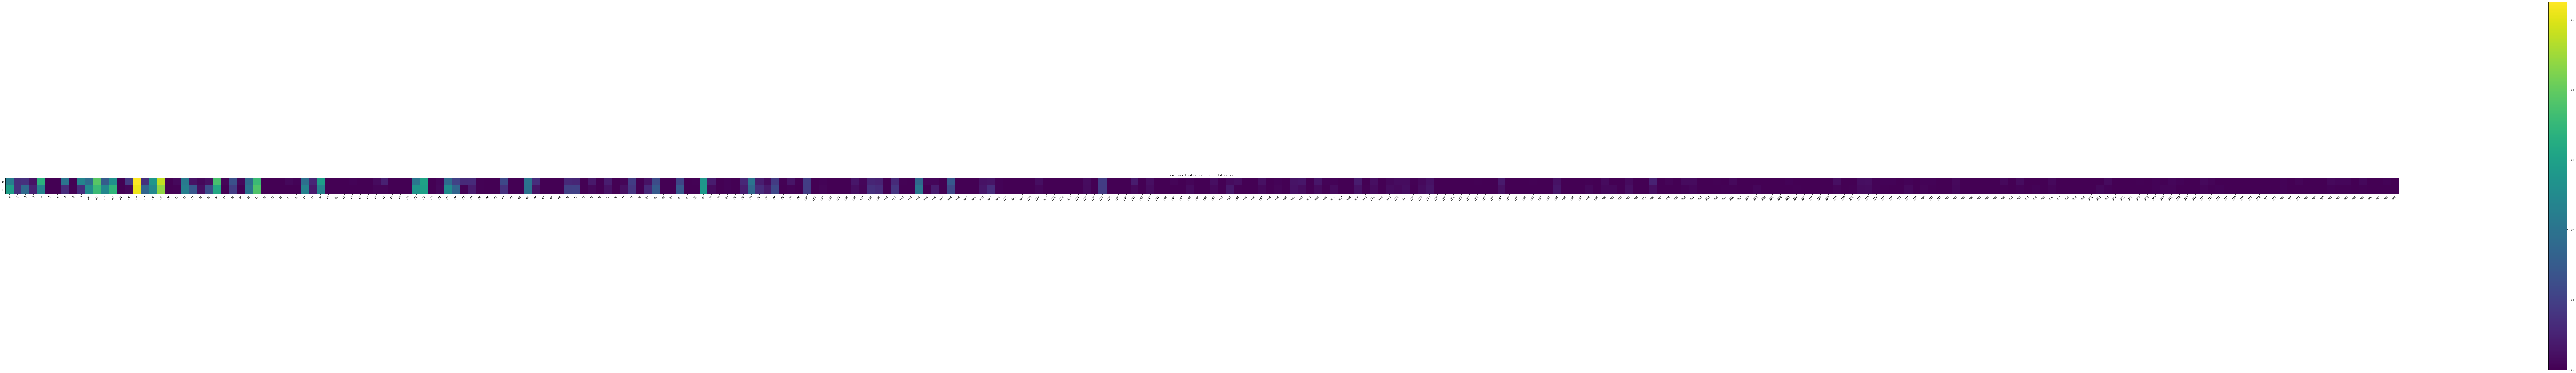

In [26]:
avg_activation = compute_model_activations(model, mode='test',num_classes=2,data='miniBooneRis')
plot_saliency_by_features(avg_activation, 2, 300, 'Neuron activation for uniform distribution', 160, 20)

## Left skewed

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.32E-03


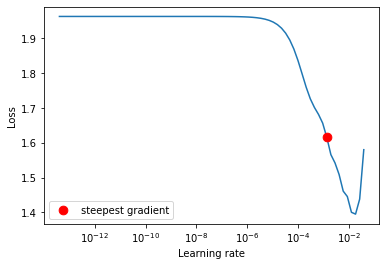

In [19]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,40,55,35,30,30,25,25,20,20]

model = ModularFC(50, dimList, 2)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

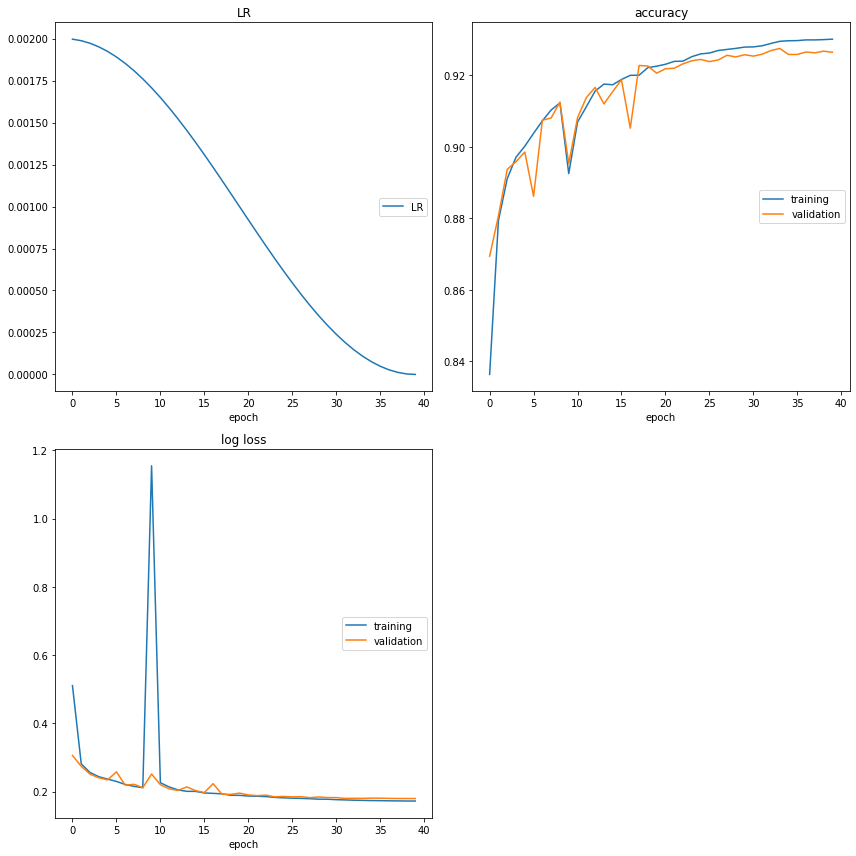

LR
	LR               	 (min:    0.000, max:    0.002, cur:    0.000)
accuracy
	training         	 (min:    0.836, max:    0.930, cur:    0.930)
	validation       	 (min:    0.869, max:    0.927, cur:    0.926)
log loss
	training         	 (min:    0.173, max:    1.155, cur:    0.173)
	validation       	 (min:    0.180, max:    0.306, cur:    0.180)


In [20]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [2E-03]
num_epochs=40
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6e965650>


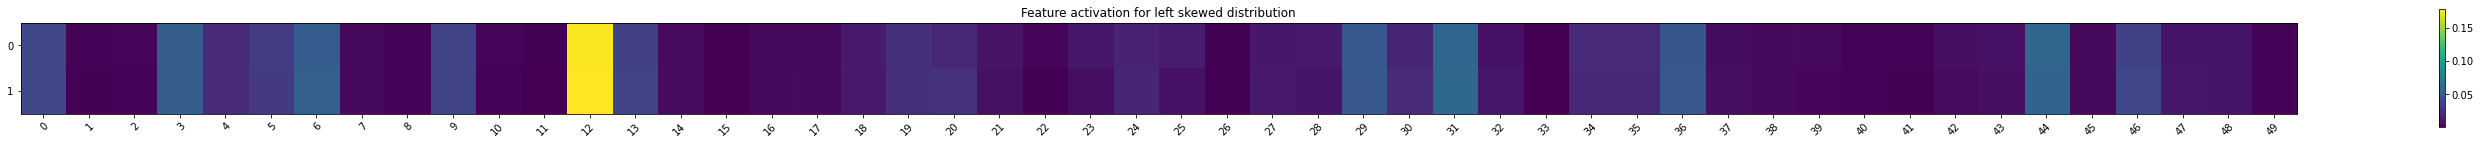

In [21]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test', data='miniBooneRis', num_features=50, num_classes=2)
plot_saliency_by_features(avg_saliency, 2, 50, 'Feature activation for left skewed distribution', 40, 2)

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6ff10190>


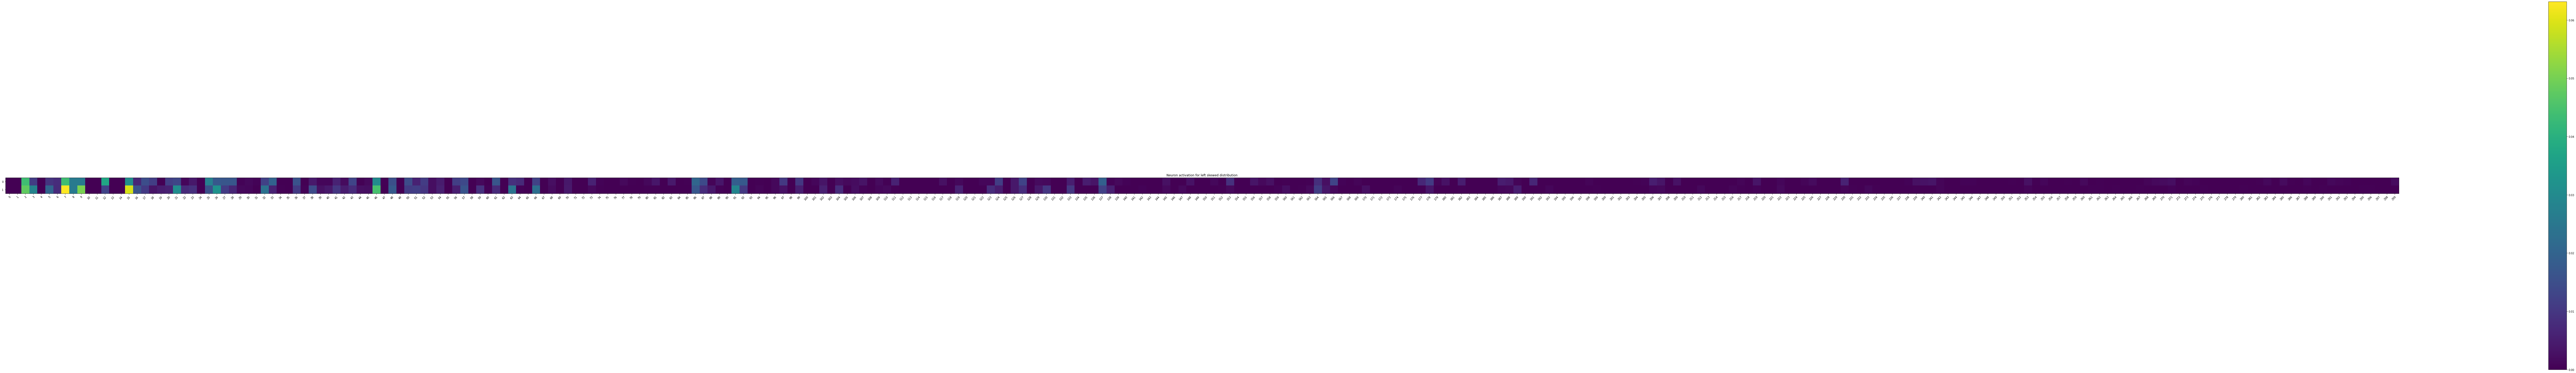

In [22]:
avg_activation = compute_model_activations(model, mode='test',num_classes=2,data='miniBooneRis')
plot_saliency_by_features(avg_activation, 2, 300, 'Neuron activation for left skewed distribution', 160, 20)

## Right Skewed

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 9.11E-04


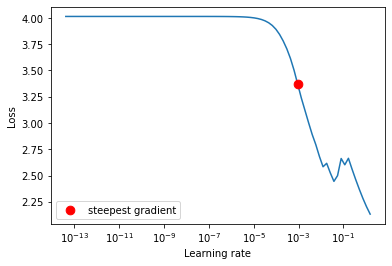

In [15]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,40,55,35,30,30,25,25,20,20]
dimList = list(reversed(dimList))
model = ModularFC(50, dimList, 2)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

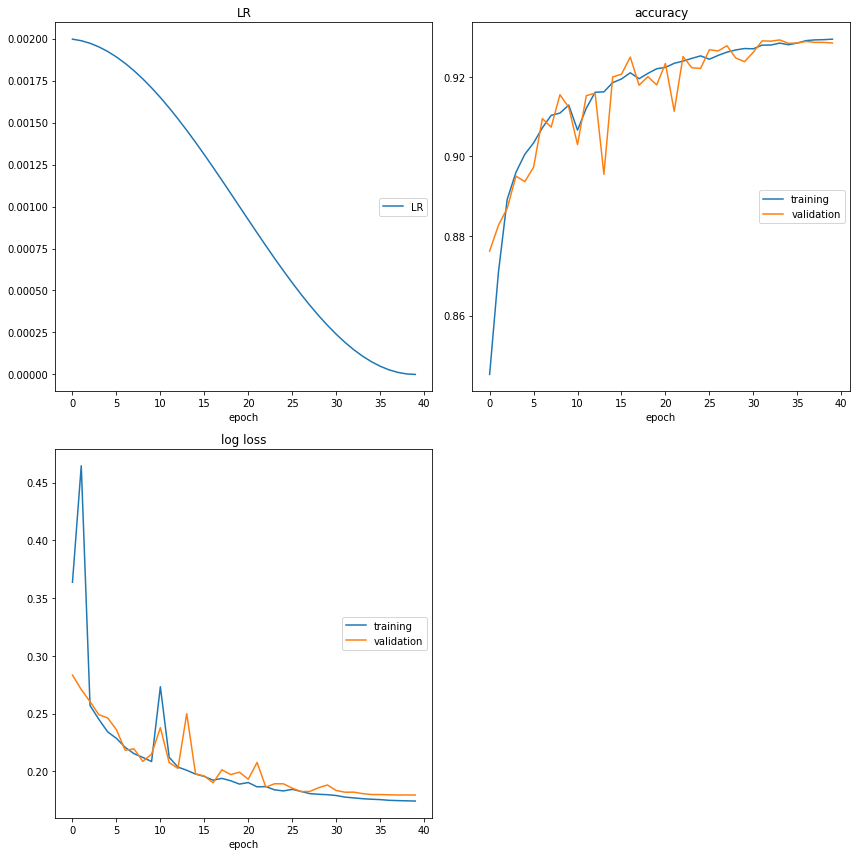

LR
	LR               	 (min:    0.000, max:    0.002, cur:    0.000)
accuracy
	training         	 (min:    0.845, max:    0.929, cur:    0.929)
	validation       	 (min:    0.876, max:    0.929, cur:    0.928)
log loss
	training         	 (min:    0.174, max:    0.465, cur:    0.174)
	validation       	 (min:    0.179, max:    0.283, cur:    0.179)


In [16]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
num_epochs = 40
lr_list = [2E-03]
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b646e8110>


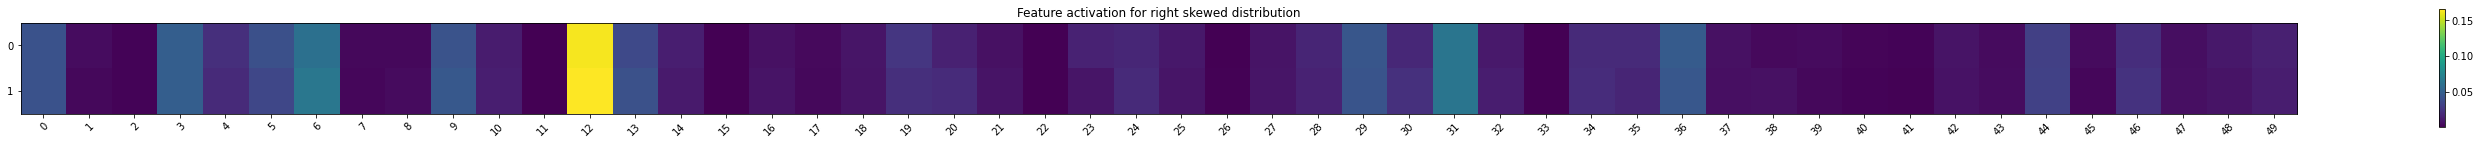

In [17]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test', data='miniBooneRis', num_features=50, num_classes=2)
plot_saliency_by_features(avg_saliency, 2, 50, 'Feature activation for right skewed distribution', 40, 2)

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6f758c90>


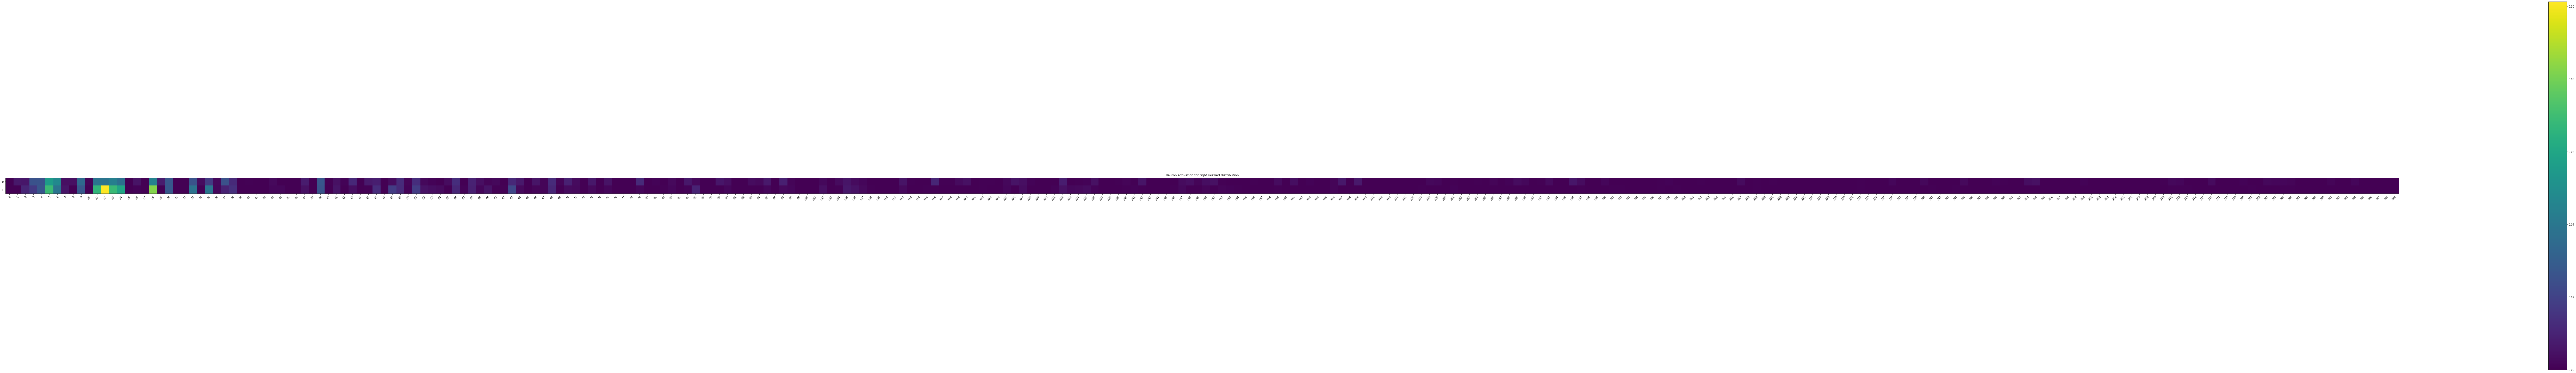

In [18]:
avg_activation = compute_model_activations(model, mode='test',num_classes=2,data='miniBooneRis')
plot_saliency_by_features(avg_activation, 2, 300, 'Neuron activation for right skewed distribution', 160, 20)

# Bimodal

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.28E-04


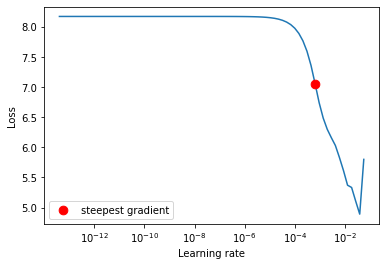

In [9]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [20,30,40,35,25,25,35,40,30,20]
dimList = list(reversed(dimList))
model = ModularFC(50, dimList, 2)
# model = FC_10(50, 2, dimList)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

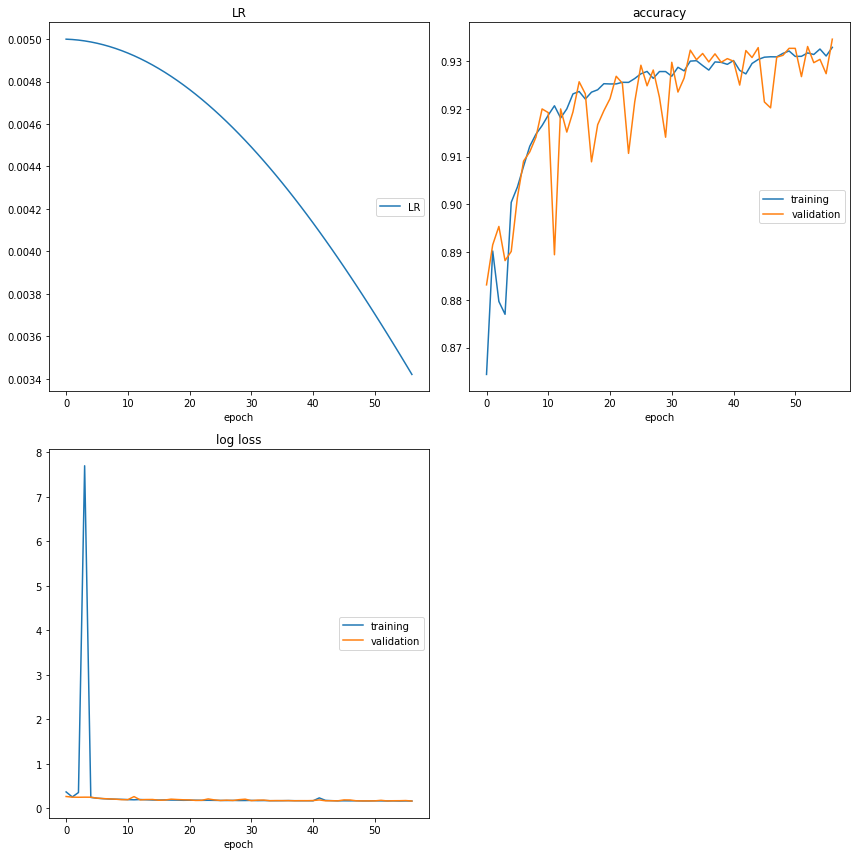

LR
	LR               	 (min:    0.003, max:    0.005, cur:    0.003)
accuracy
	training         	 (min:    0.864, max:    0.933, cur:    0.933)
	validation       	 (min:    0.883, max:    0.935, cur:    0.935)
log loss
	training         	 (min:    0.166, max:    7.699, cur:    0.166)
	validation       	 (min:    0.166, max:    0.268, cur:    0.166)


KeyboardInterrupt: ignored

In [10]:
# prepare the data
# # path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'
# train_dl, val_dl, test_dl = prepare_data('helena', 512, 512, 1024)

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [5E-03]
num_epochs=150
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  # model = FC_10(27, 100, dimList)
  model.to(device)
  # criterion = CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  # scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=1e-5, max_lr=1e-1,step_size_up=2000,mode="exp_range",gamma=0.85)
  # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, threshold=0.01)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)
  # train(train_dl, val_dl, model, 10, lr)
  # evaluate the model
  # acc = evaluate_model(test_dl, model)
  # print('Accuracy: %.3f' % acc)
  # make a single prediction
  # row = [5.1,3.5,1.4,0.2]
  # yhat = predict(row, model)
  # print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b646675d0>


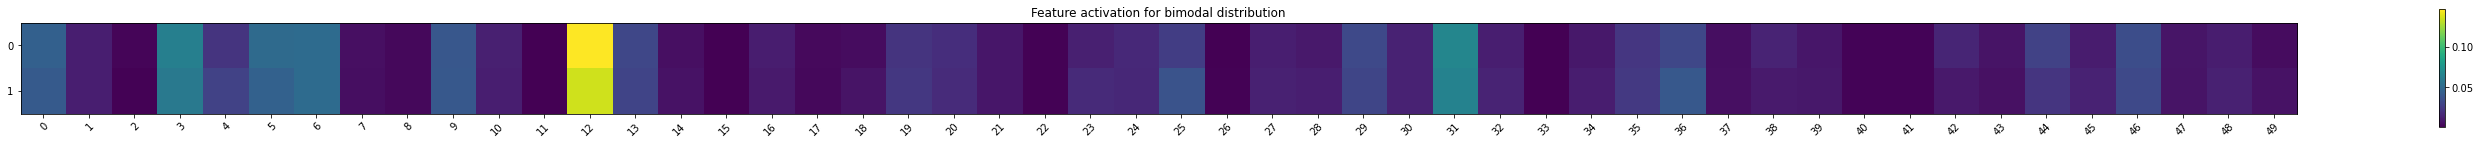

In [11]:
avg_saliency = compute_saliency_for_features(model, normalize=True, mode='test', data='miniBooneRis', num_features=50, num_classes=2)
plot_saliency_by_features(avg_saliency, 2, 50, 'Feature activation for bimodal distribution', 40, 2)

<bound method NDFrame.head of         signal  ParticleID_0  ...  ParticleID_48  ParticleID_49
0         True       2.59413  ...       0.071769       0.245996
1         True       3.86388  ...       0.333613       0.230621
2         True       3.38584  ...       0.255512       0.180901
3         True       4.28524  ...       0.473081       0.258990
4         True       5.93662  ...       1.924990       0.253893
...        ...           ...  ...            ...            ...
130059   False       4.80718  ...       3.219320       0.299487
130060   False       5.00527  ...       1.778180       0.258058
130061   False       3.10842  ...       0.730342       0.152876
130062   False       5.44560  ...       0.819867       0.210619
130063   False       4.55062  ...       0.742709       0.276477

[130064 rows x 51 columns]>
correctly in miniboone
<class 'src.minibooneDataset.minibooneDataset'> <src.minibooneDataset.minibooneDataset object at 0x7f3b6ffa7f10>


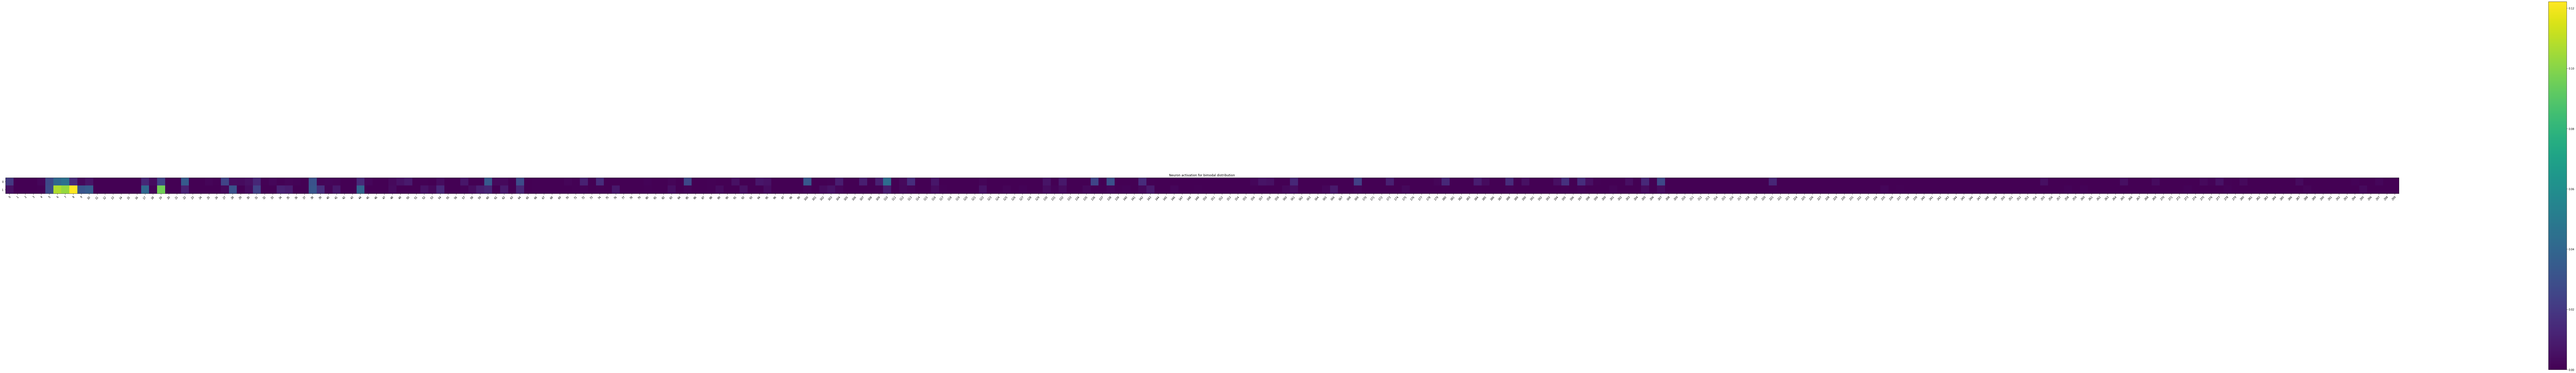

In [14]:
# avg_activation = compute_model_activations(model, mode='test')
# plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for right open distribution', 160, 20)

avg_activation = compute_model_activations(model, mode='test',num_classes=2,data='miniBooneRis')
plot_saliency_by_features(avg_activation, 2, 300, 'Neuron activation for bimodal distribution', 160, 20)

# Experiments

In [ ]:
from torch_lr_finder import LRFinder

# path = '/content/gdrive/MyDrive/Sem1/CMPSCI_682/main_project/HelenaData.csv'

dimList = [45,40,35,35,30,30,25,25,20,15]
dimList = list(reversed(dimList))
model = ModularFC(27, dimList, 100)
# model = FC_10(27, 100, dimList)
lr = 1e-15

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

lr_finder = LRFinder(model, optimizer, criterion, device='cpu')
lr_finder.range_test(train_dl, val_dl, end_lr=10, num_iter=100, step_mode='exp')
lr_finder.plot()
lr_finder.reset()

from livelossplot import PlotLosses
import matplotlib.pyplot as plt

# define the network
# train the model
lr_list = [5E-03]
num_epochs=50
for lr in lr_list:
  print("----------------lr: {}---------------".format(lr))
  model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
  train(model, optimizer, scheduler, criterion, train_dl, val_dl, epochs=num_epochs, device=device)

In [ ]:
avg_activation = compute_model_paramters(model, mode='test')
plot_saliency_by_features(avg_activation, 100, 300, 'Neuron activation for right open distribution', 160, 20)

In [ ]:
len(avg_activation)

In [ ]:
layers = [3, 5, 5, 5, 2]

layers_str = ["Input"] + ["Hidden"] * (len(layers) - 2) + ["Output"]
layers_col = ["none"] + ["none"] * (len(layers) - 2) + ["none"]
layers_fill = ["black"] + ["gray"] * (len(layers) - 2) + ["black"]

penwidth = 15
font = "Hilda 10"

print("digraph G {")
print("\tfontname = \"{}\"".format(font))
print("\trankdir=LR")
print("\tsplines=line")
print("\tnodesep=.08;")
print("\tranksep=1;")
print("\tedge [color=black, arrowsize=.5];")
print("\tnode [fixedsize=true,label=\"\",style=filled," + \
    "color=none,fillcolor=gray,shape=circle]\n")

# Clusters
for i in range(0, len(layers)):
    print(("\tsubgraph cluster_{} {{".format(i)))
    print(("\t\tcolor={};".format(layers_col[i])))
    print(("\t\tnode [style=filled, color=white, penwidth={},"
          "fillcolor={} shape=circle];".format(
              penwidth,
              layers_fill[i])))

    print(("\t\t"), end=' ')

    for a in range(layers[i]):
        print("l{}{} ".format(i + 1, a), end=' ')

    print(";")
    print(("\t\tlabel = {};".format(layers_str[i])))

    print("\t}\n")

# Nodes
for i in range(1, len(layers)):
    for a in range(layers[i - 1]):
        for b in range(layers[i]):
            print("\tl{}{} -> l{}{}".format(i, a, i + 1, b))

print("}")

digraph G {
	fontname = "Hilda 10"
	rankdir=LR
	splines=line
	nodesep=.08;
	ranksep=1;
	edge [color=black, arrowsize=.5];
	node [fixedsize=true,label="",style=filled,color=none,fillcolor=gray,shape=circle]

	subgraph cluster_0 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=black shape=circle];
		 l10  l11  l12  ;
		label = Input;
	}

	subgraph cluster_1 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l20  l21  l22  l23  l24  ;
		label = Hidden;
	}

	subgraph cluster_2 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l30  l31  l32  l33  l34  ;
		label = Hidden;
	}

	subgraph cluster_3 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l40  l41  l42  l43  l44  ;
		label = Hidden;
	}

	subgraph cluster_4 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=black shape=circle];
		 l50  l51  ;
		label = Outp